### Survival rate- Decision Tree - Bagging, Random Forest and Adam Boost tree Classification

In [73]:
#import libs
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import RandomForestClassifier
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/tree/__init__.py)

In [2]:
path = '/home/conmec/Python/Maria_sTraining/Hyperion_Training/T44/'

# read csv using pandas
df_titanic = pd.read_csv(path+"titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.shape

(891, 12)

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Find if there are missing values

In [5]:
# get the number of missing data points per column
missing_values_count = df_titanic.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:11]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(df_titanic.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

8.099513655069211

8.099% of the values are missing
##Filling in missing values automatically
Use Panda's fillna() function to fill in missing values in a dataframe.i.e fill NaN with 0.

In [7]:
# Create a temporary dataset
temp_df = df_titanic

# replace all NA's with 0
temp_df.fillna(0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Checking the surfvival by grouping by

In [8]:
df_survived = df_titanic.groupby(by = "Survived").count()
df_survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [9]:
positive = df_titanic.Survived[df_titanic['Survived'] == 1].count()
negative = df_titanic.Survived[df_titanic['Survived'] == 0].count()
print( 'Survived =' , positive,'not_survived = ', negative)

Survived = 342 not_survived =  549


In [10]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Encode the embarked variable manually
def f(x):
    if x == 'C':
        val = 0
    else:
        val = 1
    return val

df_titanic['EncodedEmbarked'] = df_titanic['Embarked'].apply(f)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EncodedEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Train a decision tree

In [17]:
#Independent and dependent vars
X = df_titanic.iloc[:,[2, 5, 6, 7, 9, 12]].values
y = df_titanic.iloc[:,1].values
#Reshape
X = X.reshape(-1, 6)

X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           random_state=123, shuffle=False)

r=4
#split the train/test data
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.3, random_state=r)



### Create a Bagged, Random Forest and Boosted tree for the titanic dataset

In [37]:
# Create base model
base = DecisionTreeClassifier(max_depth=30)

#Boosting and bagged models 
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=7)
adam = AdaBoostClassifier(estimator=base, n_estimators=100, random_state=7)
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
adam.fit(X_train, y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))
print("Accuracy adam:",adam.score(X_test, y_test))

Accuracy base: 0.91
Accuracy ensemble: 0.9433333333333334
Accuracy adam: 0.9166666666666666


/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### From the Random Forest model, determine  which of the features is the one that contributes the most to predicting whether a passenger survives or not.

From Random Forest ensemble method in sklearn print importance scores for features in the dataset to find the feature

In [38]:
forest = RandomForestClassifier(n_estimators=100, random_state=7, max_depth=4)
forest.fit(X_train, y_train)
print("Accuracy RandomForest:",forest.score(X_test, y_test))


Accuracy RandomForest: 0.94


From the Random Forest model, determine which of the features is the one
that contributes the most to predicting whether a passenger survives or
not.

In [39]:
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp.sort_values(ascending=False)

0    0.429585
1    0.239719
2    0.140655
3    0.091611
4    0.059617
8    0.010686
7    0.009916
6    0.006671
9    0.006314
5    0.005227
dtype: float64

Pick one of these methods, and tune the parameters n_estimators and max_depth

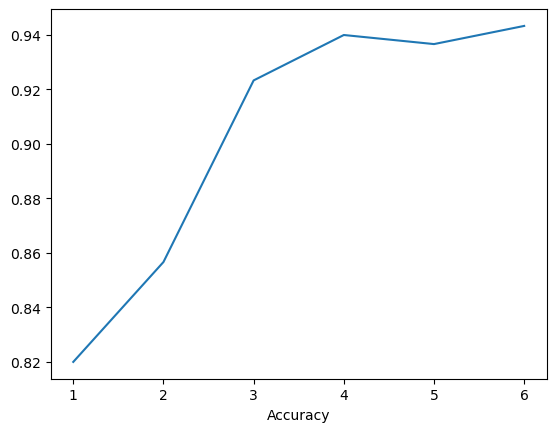

In [62]:
# looking at effect of pruning the forest-n_estimators
estimators_depths = range(1,forest.n_estimators+1)

estimators_scores = [] 
for d in estimators_depths:
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  estimators_scores.append(score)

fig, ax = plt.subplots()
ax.plot(estimators_depths, estimators_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(estimators_depths)
plt.show()


In [63]:
# fitting the chosen forest tree
best_estimators = estimators_depths[np.argmax(estimators_scores)]
print('Best performance reached at estimators of:', best_estimators)

pruned = DecisionTreeClassifier(max_depth=best_estimators)
pruned.fit(X, y)

Best performance reached at estimators of: 6


DecisionTreeClassifier(max_depth=6)

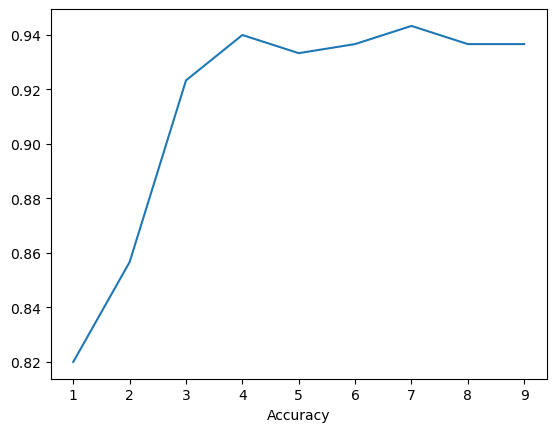

In [64]:
# looking at effect of pruning the base
pruned_depths = range(1,base.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [65]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 7


DecisionTreeClassifier(max_depth=7)

In [77]:
# select important features
X = df_titanic.iloc[:,[0, 2, 3, 4, 8]].values
y = df_titanic.iloc[:,1].values

#X = X.reshape(-1, 5)
# Create toy data
X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=5, n_redundant=0,
                           random_state=123, shuffle=False)


# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
forest_pruned = RandomForestClassifier(n_estimators=6, 
                                random_state=7, max_depth=6)
forest_pruned.fit(X_train, y_train)
print("Accuracy base:",forest_pruned.score(X_test, y_test))

Accuracy base: 0.9566666666666667


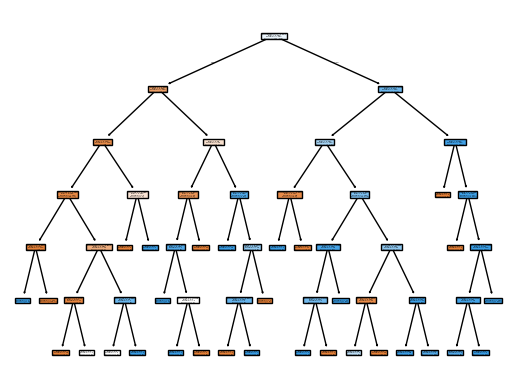

In [81]:
fig = plt.figure()

tree.plot_tree(forest_pruned.estimators_[0],
               feature_names = df_titanic.columns, 
               filled = True)
fig.savefig("random_forest.png")